# Лабараторная работа №4

# Применение методов классификации

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, balanced_accuracy_score
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score, roc_curve, auc

### Импорт и предварительная обработка данных

In [3]:
df = pd.read_csv('1heart.csv')
df.head(20)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289,0,Normal,172.0,N,0.0,Up,0
1,49,F,NAP,160.0,180,0,Normal,156.0,N,1.0,Flat,1
2,37,M,ATA,130.0,283,0,ST,98.0,N,0.0,Up,0
3,48,F,ASY,138.0,214,0,Normal,108.0,Y,1.5,Flat,1
4,54,M,NAP,150.0,195,0,Normal,122.0,N,0.0,Up,0
5,39,M,NAP,120.0,339,0,Normal,170.0,N,0.0,Up,0
6,45,F,ATA,130.0,237,0,Normal,170.0,N,0.0,Up,0
7,54,M,ATA,110.0,208,0,Normal,142.0,N,0.0,Up,0
8,37,M,ASY,140.0,207,0,Normal,130.0,Y,1.5,Flat,1
9,48,F,ATA,120.0,284,0,Normal,120.0,N,0.0,Up,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             925 non-null    int64  
 1   Sex             925 non-null    object 
 2   ChestPainType   925 non-null    object 
 3   RestingBP       923 non-null    float64
 4   Cholesterol     924 non-null    object 
 5   FastingBS       925 non-null    int64  
 6   RestingECG      924 non-null    object 
 7   MaxHR           924 non-null    float64
 8   ExerciseAngina  925 non-null    object 
 9   Oldpeak         925 non-null    float64
 10  ST_Slope        925 non-null    object 
 11  HeartDisease    925 non-null    int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 86.8+ KB


In [5]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

Проверка датафрема на дубликаты

In [6]:
print(df.duplicated().sum())

3


In [7]:
df = df.drop_duplicates()
print(df.duplicated().sum())

0


In [8]:
print(df.isna().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         2
Cholesterol       1
FastingBS         0
RestingECG        1
MaxHR             1
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


Проверка датафрейма на наличие пустых значений

In [9]:
df = df.dropna(subset=['RestingBP'])
df = df.dropna(subset=['RestingECG'])
df = df.dropna(subset=['MaxHR'])
print(df.isna().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


Конветируем значение колонки в числовое, убираем от туда букву, по какой-то причине попавшую в одну строку.

In [10]:
df['Cholesterol'] = df['Cholesterol'].str.replace("a","")
df['Cholesterol'] = pd.to_numeric(df['Cholesterol'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 924
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    float64
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    float64
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 93.2+ KB


Отбрасываем текстовые значения

In [11]:
df = df.drop('Sex', axis=1)
df = df.drop('ChestPainType', axis=1)
df = df.drop('RestingECG', axis=1)
df = df.drop('ExerciseAngina', axis=1)
df = df.drop('ST_Slope', axis=1)
df.head(20)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140.0,289,0,172.0,0.0,0
1,49,160.0,180,0,156.0,1.0,1
2,37,130.0,283,0,98.0,0.0,0
3,48,138.0,214,0,108.0,1.5,1
4,54,150.0,195,0,122.0,0.0,0
5,39,120.0,339,0,170.0,0.0,0
6,45,130.0,237,0,170.0,0.0,0
7,54,110.0,208,0,142.0,0.0,0
8,37,140.0,207,0,130.0,1.5,1
9,48,120.0,284,0,120.0,0.0,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 924
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           918 non-null    int64  
 1   RestingBP     918 non-null    float64
 2   Cholesterol   918 non-null    int64  
 3   FastingBS     918 non-null    int64  
 4   MaxHR         918 non-null    float64
 5   Oldpeak       918 non-null    float64
 6   HeartDisease  918 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 57.4 KB


Обработка данных завершена

Целевым признаком выберем колонку с информацией о наличии или отсутствии сердечного заболевания. Уберём из таблицы с признаками столбцы, сильно коррелирующие друг с другом, а также значения, слишком слабо коррелирующие с целевым признаком:

<AxesSubplot:>

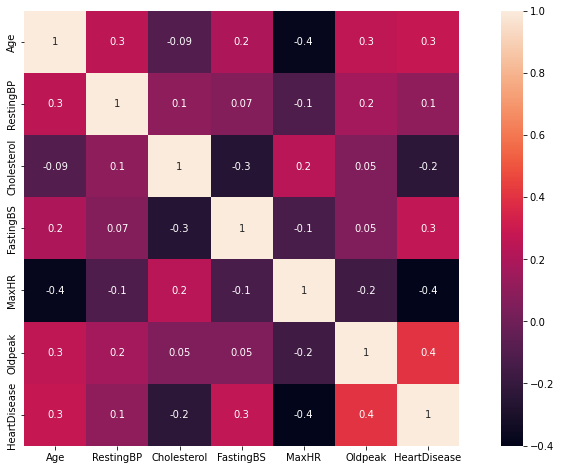

In [13]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot = True, fmt='.1g', square=True)

In [14]:
sc = StandardScaler()
y = df['HeartDisease'] # Вектор целевой переменной
x = sc.fit_transform(df.drop(['HeartDisease', 'Age', 'MaxHR'], axis=1))

Разобъём набор данных на тренировочной и тестовый датасеты с помощью train_test_split:

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

### Разработаем предсказательную модель качественного отклика методом k-ближайших соседей:

In [16]:
knn = KNeighborsClassifier(metric='euclidean') # Инициализируем модель
knn.fit(x_train, y_train)
train_predictions = knn.predict(x_test)

Подсчитаем метрики "Accuracy", "Precision", "Recall", "Balanced accuracy", "F1 score":

In [17]:
acc = accuracy_score(y_test, train_predictions)
pre = precision_score(y_test, train_predictions)
rec = recall_score(y_test, train_predictions)
bal_acc = balanced_accuracy_score(y_test, train_predictions)
f1 = f1_score(y_test, train_predictions)
print('accuracy: ' + str(acc)) # Доля правильных ответов
print('precision: ' + str(pre)) # Точность
print('recall: ' + str(rec)) # Полнота
print('balanced accuracy: ' + str(bal_acc)) # Баланс между метриками
print('f1: ' + str(f1))

accuracy: 0.6847826086956522
precision: 0.6948051948051948
recall: 0.7278911564625851
balanced accuracy: 0.6817750355956336
f1: 0.7109634551495015


Высчитаем матрицу ошибок:

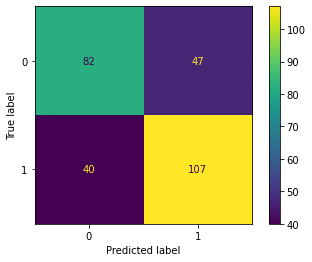

True Positive: 107
False Positive: 47
True Negative: 82
False Negative: 40


In [18]:
cm = confusion_matrix(y_test,train_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()
tn, fp, fn, tp = cm.ravel()
print('True Positive: ' + str(tp))
print('False Positive: ' + str(fp))
print('True Negative: ' + str(tn))
print('False Negative: ' + str(fn))

Высчитаем ROC AUC:

In [19]:
knn_probs = knn.predict_proba(x_test) # получаем предказания
knn_probs = knn_probs[:, 1]
knn_auc = roc_auc_score(y_test, knn_probs) # рассчитываем ROC AUC
print('Метод k-ближайших соседей: ROC AUC=' + str(knn_auc))
fpr_knn, tpr_knn, treshold = roc_curve(y_test, knn_probs) # рассчитываем roc-кривую
knn_roc_auc = auc(fpr_knn, tpr_knn)

Метод k-ближайших соседей: ROC AUC=0.7427358540315351


### Разработаем предсказательную модель качественного отклика методом логистической регрессии:

In [20]:
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)
train_predictions = lr.predict(x_test)

Подсчитаем метрики "Accuracy", "Precision", "Recall", "Balanced accuracy", "F1 score":

In [21]:
acc = accuracy_score(y_test, train_predictions)
pre = precision_score(y_test, train_predictions)
rec = recall_score(y_test, train_predictions)
bal_acc = balanced_accuracy_score(y_test, train_predictions)
f1 = f1_score(y_test, train_predictions)
print('accuracy: ' + str(acc))
print('precision: ' + str(pre))
print('recall: ' + str(rec))
print('balanced accuracy: ' + str(bal_acc))
print('f1: ' + str(f1))

accuracy: 0.7318840579710145
precision: 0.7588652482269503
recall: 0.7278911564625851
balanced accuracy: 0.7321626324948585
f1: 0.7430555555555556


Высчитаем матрицу ошибок:

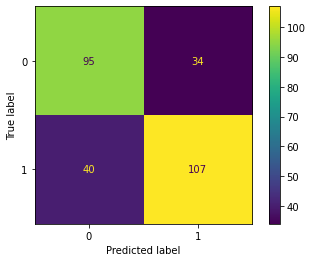

True Positive: 107
False Positive: 34
True Negative: 95
False Negative: 40


In [22]:
cm = confusion_matrix(y_test, train_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot()
plt.show()
tn, fp, fn, tp = cm.ravel()
print('True Positive: ' + str(tp))
print('False Positive: ' + str(fp))
print('True Negative: ' + str(tn))
print('False Negative: ' + str(fn))

Высчитаем ROC AUC:

In [23]:
lr_probs = lr.predict_proba(x_test)
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(y_test, lr_probs)
print('Логистическая регрессия: ROC AUC=' +str(lr_auc))
fpr_lr, tpr_lr, treshold = roc_curve(y_test, lr_probs)
lr_roc_auc = auc(fpr_lr, tpr_lr)

Логистическая регрессия: ROC AUC=0.7801244528819279


### Разработаем предсказательную модель качественного отклика методом случайного леса

In [24]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
train_predictions = rfc.predict(x_test)

Знеачение "max_depth" по умолчанию равно "None", что означает что узлы будут расширяться до тех пор, пока все листья не станут чистыми или пока все листья не будут содержать выборок меньше, чем "min_samples_split", которое по умолчанию равно двойке. Значение "n_estimators", отображающее количество деревьев в лесу выставлено по умолчанию равным 100.

Подсчитаем метрики "Accuracy", "Precision", "Recall", "Balanced accuracy", "F1 score":

In [26]:
acc = accuracy_score(y_test, train_predictions)
pre = precision_score(y_test, train_predictions)
rec = recall_score(y_test, train_predictions)
bal_acc = balanced_accuracy_score(y_test, train_predictions)
f1 = f1_score(y_test, train_predictions)
print('accuracy: ' + str(acc))
print('precision: ' + str(pre))
print('recall: ' + str(rec))
print('balanced accuracy: ' + str(bal_acc))
print('f1: ' + str(f1))

accuracy: 0.6702898550724637
precision: 0.6866666666666666
recall: 0.7006802721088435
balanced accuracy: 0.6681695934187628
f1: 0.6936026936026937


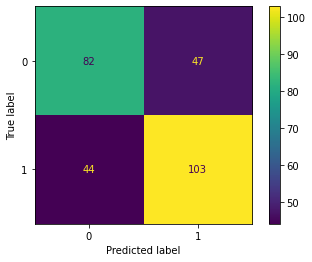

True Positive: 103
False Positive: 47
True Negative: 82
False Negative: 44


In [27]:
cm = confusion_matrix(y_test, train_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot()
plt.show()
tn, fp, fn, tp = cm.ravel()
print('True Positive: ' + str(tp))
print('False Positive: ' + str(fp))
print('True Negative: ' + str(tn))
print('False Negative: ' + str(fn))

In [28]:
rfc_probs = rfc.predict_proba(x_test)
rfc_probs = rfc_probs[:, 1]
rfc_auc = roc_auc_score(y_test, rfc_probs)
print('Метод случайного леса: ROC AUC=' + str(rfc_auc))
fpr_rfc, tpr_rfc, treshold = roc_curve(y_test, rfc_probs)
rfc_roc_auc = auc(fpr_rfc, tpr_rfc)

Метод случайного леса: ROC AUC=0.7635922586088699


Построим графики ROC-кривых:

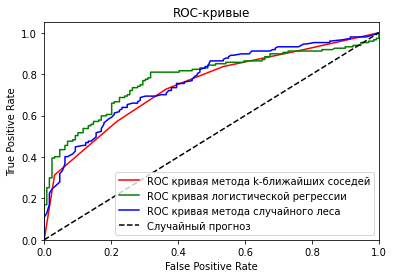

In [29]:
plt.plot(fpr_knn, tpr_knn, color='red',
         label='ROC кривая метода k-ближайших соседей' % knn_roc_auc)
plt.plot(fpr_lr, tpr_lr, color='green',
         label='ROC кривая логистической регрессии' % lr_roc_auc)
plt.plot(fpr_rfc, tpr_rfc, color='blue',
         label='ROC кривая метода случайного леса' % rfc_roc_auc)
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label='Случайный прогноз')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые')
plt.legend(loc="lower right")
plt.show()

Вывод: в ходе выполнения лабораторной работы изучены алгоритмы и методы классификации данных. Были разработаны предсказательные модели, вычисляющие по набору признаков, на наличие сердечного заболевания на основе методов: k- ближайших соседей, логистической регрессии. Были высчитаны метрики, позволяющие оценить качество работы классификаторов. Лучше всего высчитывает предсказания классификатор, основанный на методе логистической регрессии, а хуже всех себя показал метод k-ближайших соседей. Тем не менее, все три метода классификации данных показали неплохие результаты. Для каждого метода были, также, были построены матрицы неточностей и график ROC-кривых, который подтвердил полученные оценки качества работы методов классификации.

### Дополнительное задание

Не существует конкретного способа определить наилучшее значение для k, поэтому нам нужно попробовать несколько значений, чтобы найти лучшее из них. Но чаще всего наиболее предпочтительным значением для k является 5:
Низкое значение k, например, 1 или 2, может привести к эффекту недообучения модели.
Высокое значение k на первый взгляд выглядит приемлемо, однако возможны трудности с производительностью модели, а также повышается риск переобучения.